# Classifying images using sklearn digits dataset and C-support vector Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn.datasets
print('Setup Complite!')

Setup Complite!


In [2]:
digits = sklearn.datasets.load_digits()
X = pd.DataFrame(digits.data, columns=digits.feature_names)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
digits.target.shape

(1797,)

In [4]:
y = pd.DataFrame(digits.target)
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [5]:
def show_image(X, y, index):
    plt.imshow(X.images[index])
    plt.xlabel(str(y.iloc[index,0]))


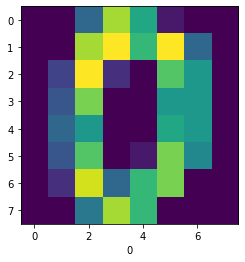

In [6]:
show_image(digits, y, 0)

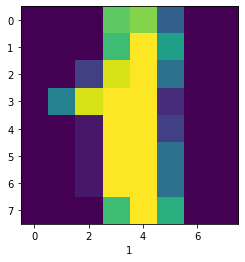

In [7]:
show_image(digits, y, 1)

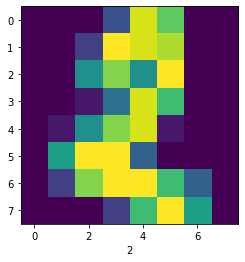

In [8]:
show_image(digits, y, 2)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1437, 64) (1437, 1) (360, 64) (360, 1)


In [10]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [11]:
y_predicted = model.predict(X[:6])
y_predicted = pd.DataFrame(y_predicted)
y_predicted

,0
0,0
1,1
2,2
3,3
4,4
5,9


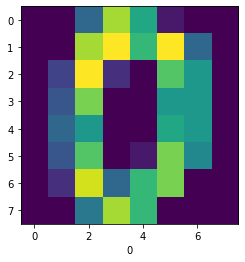

In [12]:
show_image(digits, y_predicted, 0)

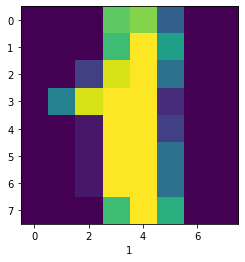

In [13]:
show_image(digits, y_predicted, 1)

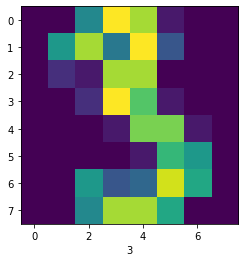

In [14]:
show_image(digits, y_predicted, 3)

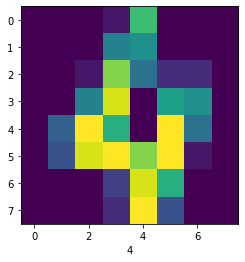

In [15]:
show_image(digits, y_predicted, 4)

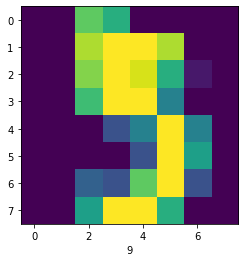

In [16]:
show_image(digits, y_predicted, 5)

In [17]:
model.score(X_test, y_test)

0.9972222222222222

Text(114.0, 0.5, 'Truth')

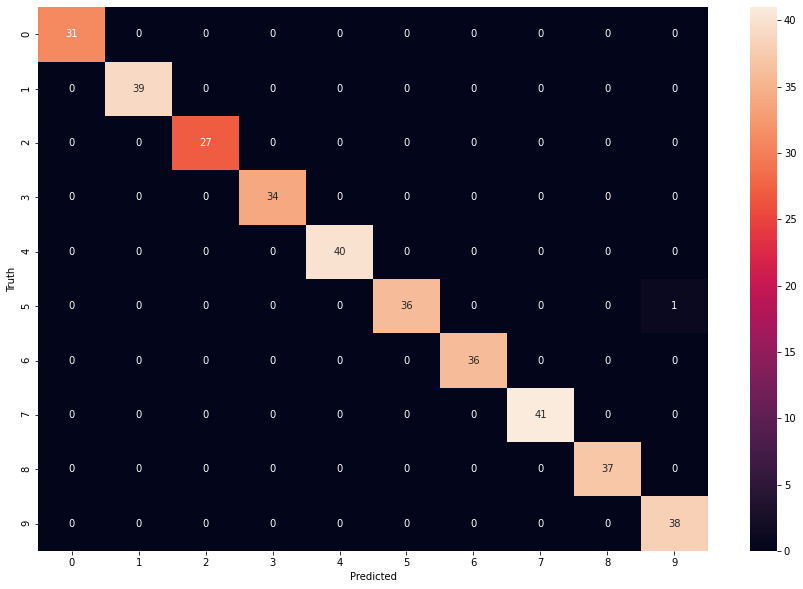

In [18]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize=(15, 10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model have 99% accuracy. From heatmap above it can be seen that only one number was predicted as 9 while the true value was 5